# Step 1: Installation and Setup

In [ ]:
# Installing TensorFlow
! pip install -q tensorflow-gpu

     |████████████████████████████████| 380.8MB 42kB/s 
     |████████████████████████████████| 3.8MB 39.6MB/s 
     |████████████████████████████████| 450kB 33.9MB/s 
     |████████████████████████████████| 81kB 9.1MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.1 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorboard 2.0.1 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.7.1 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existi

In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.0.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Data preprocessing

In [ ]:
# importing the dataset
from tensorflow.keras.datasets import mnist

In [ ]:
# loading the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


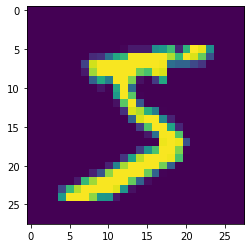

In [ ]:
plt.imshow(x_train[0])

In [ ]:
y_train[0]

5

In [ ]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [ ]:
x_train.min(), x_train.max()

(0, 255)

In [ ]:
y_train.min(), y_train.max()

(0, 9)

In [ ]:
# normalize the images
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
x_train.min(), x_train.max()

(0.0, 1.0)

In [ ]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
# reshape the images
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [ ]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
input_shape = x_train[0].shape

In [ ]:
print(input_shape)

(28, 28, 1)


# Step 3: Building the Model

In [ ]:
# define an object
model = tf.keras.models.Sequential()

In [ ]:
# Adding first CNN layer
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape = (28,28,1)))

# Adding second CNN layer
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))

# adding maxpool layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

# adding dropout layer
model.add(tf.keras.layers.Dropout(0.4))

# addding flatten layer
model.add(tf.keras.layers.Flatten())

# fully connected layer (dense layer)
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

# output layer
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

# Step 4: Training the model

In [ ]:
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 169s 3ms/sample - loss: 0.1774 - sparse_categorical_accuracy: 0.9471 - val_loss: 0.0562 - val_sparse_categorical_accuracy: 0.9809
Epoch 2/10
60000/60000 [==============================] - 168s 3ms/sample - loss: 0.0514 - sparse_categorical_accuracy: 0.9838 - val_loss: 0.0451 - val_sparse_categorical_accuracy: 0.9857
Epoch 3/10
60000/60000 [==============================] - 168s 3ms/sample - loss: 0.0356 - sparse_categorical_accuracy: 0.9890 - val_loss: 0.0363 - val_sparse_categorical_accuracy: 0.9880
Epoch 4/10
60000/60000 [==============================] - 169s 3ms/sample - loss: 0.0261 - sparse_categorical_accuracy: 0.9913 - val_loss: 0.0295 - val_sparse_categorical_accuracy: 0.9905
Epoch 5/10
60000/60000 [==============================] - 166s 3ms/sample - loss: 0.0198 - sparse_categorical_accuracy: 0.9937 - val_loss: 0.0315 - val_sparse_categorical_accuracy: 0.9903
Epoch 6/10

In [ ]:
# model predictions
y_pred = model.predict_classes(x_test)

In [ ]:
y_pred[15], y_test[15]

(5, 5)

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 978    1    0    0    0    0    1    0    0    0]
 [   0 1134    0    0    0    0    1    0    0    0]
 [   4    0 1022    0    1    0    0    4    1    0]
 [   0    0    1 1008    0    1    0    0    0    0]
 [   0    1    0    0  968    0    3    0    0   10]
 [   1    0    1    4    0  883    3    0    0    0]
 [   5    2    0    0    3    1  945    0    2    0]
 [   1    4    4    1    0    0    0 1016    1    1]
 [   4    0    3    0    1    0    0    1  962    3]
 [   1    2    1    0    3    2    0    5    0  995]]


In [ ]:
acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)

0.9911


# Step 5: Learning curve

In [ ]:
def learning_curve(history, epoch):

  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['sparse_categorical_accuracy'])
  plt.plot(epoch_range, history.history['val_sparse_categorical_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  # training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

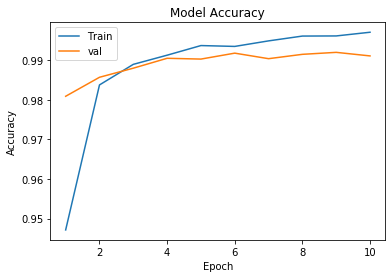

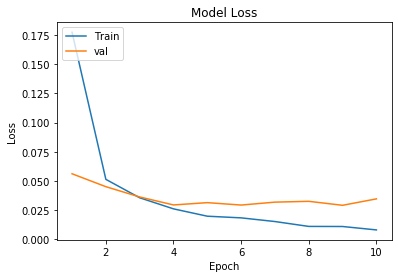

In [ ]:
learning_curve(history, 10)